In [1]:
import chemiscope
import numpy as np
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from ase.io import read
import glob
import sys
sys.path.append('../../')
from helpers.utils import get_name_from_path
from helpers.utils import natural_sort_key

Calculate deviations of samples from an input transition state:

In [4]:
# SPECIFY INPUT DATASETS

# grid of solvated / reactive samples
# ds_name_stub = f"data/endo_DA_n=8_r_dist*_diverse_solv_0.xyz"
# ds_name_stub = f"data/endo_DA_n=8_r_dist*_local_solv_0.xyz"
# ds_name_stub = f"data/endo_DA_n=8_r_dist*_diverse_solv_25.xyz"
# ds_name_stub = f"data/endo_DA_n=8_r_dist*_diverse_solv_75.xyz"
# ds_name_stub = f"data/endo_DA_n=8_r_dist*_local_solv_25.xyz"
# ds_name_stub = f"data/endo_DA_n=8_r_dist*_diverse_solv_50.xyz"
# ds_name_stub = f"data/endo_DA_n=8_r_dist*_diverse_solv_100.xyz"
# ds_name_stub = f"data/endo_DA_n=8_r_dist*_diverse_solv_100.xyz"
# ds_name_stub = f"data/endo_DA_n=8_r_dist*_diverse_solv_100_rep_2.xyz"
# ds_name_stub = f"data/endo_DA_n=8_r_dist*_diverse_solv_100_rep_3.xyz"
ds_name_stub = f"data/endo_DA_n=8_r_dist*_diverse_solv_0_rep_3.xyz"
# ds_name_stub = f"data/endo_DA_n=8_r_dist*_local_solv_100.xyz"
# ds_name_stub = f"data/endo_DA_n=20_r_dist*_local_solv_100.xyz"
ds_fpaths = sorted(glob.glob(ds_name_stub), key=natural_sort_key)
assert len(ds_fpaths) > 0, f"No files detected with name stub {ds_name_stub}..."
ds_names = [get_name_from_path(fpath) for fpath in ds_fpaths]
print('No. Datasets: ', len(ds_fpaths))
print('DS Names: ', ds_names)

# input ts here
ts_ref_config = read(f'data/endo_DA_vac_TS_wB97M.xyz', ':')[0]
r1, r2 = (1, 12), (6, 11)

ts_ref_bond_distances = {r1: ts_ref_config.get_distance(*r1), r2: ts_ref_config.get_distance(*r2)}
ts_ref_bond_dist_tuple = tuple([dist for dist in ts_ref_bond_distances.values()])
print(f'TS ref bond distances: {ts_ref_bond_distances}')

No. Datasets:  4
DS Names:  ['endo_DA_n=8_r_dist_0_3_diverse_solv_0_rep_3', 'endo_DA_n=8_r_dist_1_5_diverse_solv_0_rep_3', 'endo_DA_n=8_r_dist_3_0_diverse_solv_0_rep_3', 'endo_DA_n=8_r_dist_6_0_diverse_solv_0_rep_3']
TS ref bond distances: {(1, 12): 2.0567445181402575, (6, 11): 2.3597223605754976}


Dataset endo_DA_n=8_r_dist_0_3_diverse_solv_0_rep_3 with length 8
Points:  [[-0.064  0.293]
 [-0.135  0.296]
 [ 0.011  0.352]
 [-0.135  0.296]
 [ 0.005  0.295]
 [ 0.002  0.28 ]
 [ 0.063  0.262]
 [-0.064  0.293]]
R1 Distances from TS [-0.064 -0.135  0.011 -0.135  0.005  0.002  0.063 -0.064]
R2 Distances from TS [0.293 0.296 0.352 0.296 0.295 0.28  0.262 0.293]


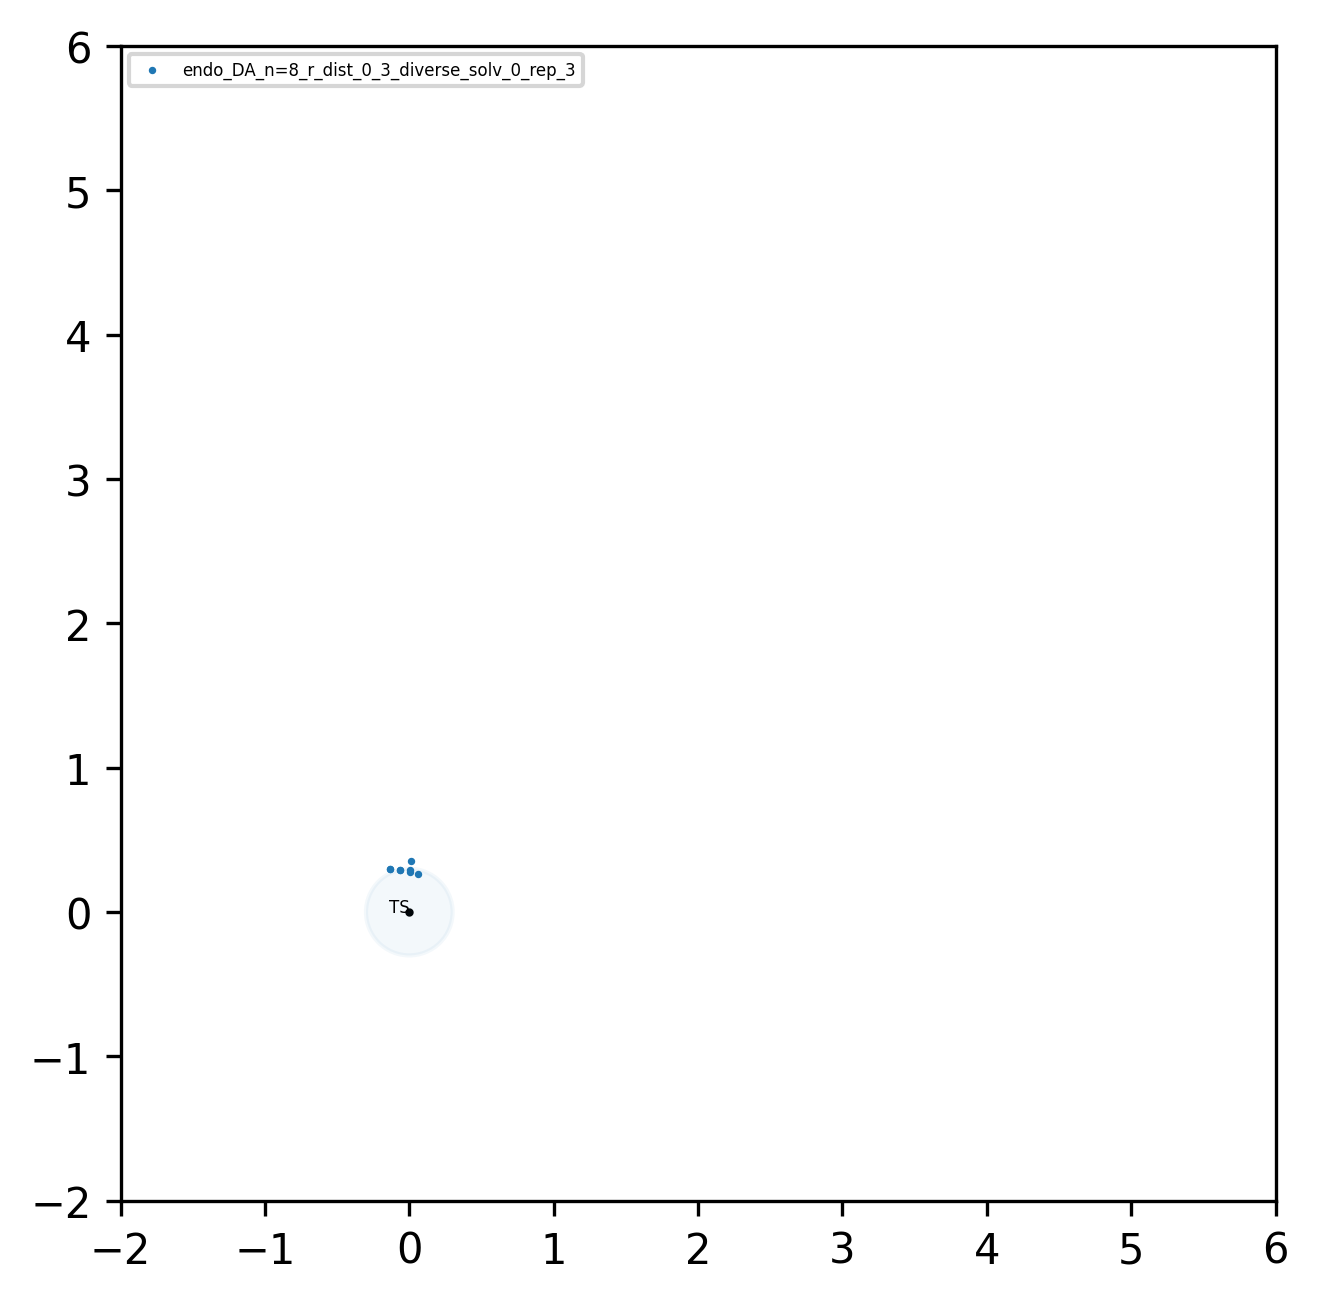

Dataset endo_DA_n=8_r_dist_1_5_diverse_solv_0_rep_3 with length 8
Points:  [[-0.497 -0.7  ]
 [-0.542 -0.338]
 [ 0.063  0.262]
 [ 0.005  0.295]
 [-0.446  0.328]
 [-0.542 -0.338]
 [-0.497 -0.7  ]
 [-0.342 -0.485]]
R1 Distances from TS [-0.497 -0.542  0.063  0.005 -0.446 -0.542 -0.497 -0.342]
R2 Distances from TS [-0.7   -0.338  0.262  0.295  0.328 -0.338 -0.7   -0.485]


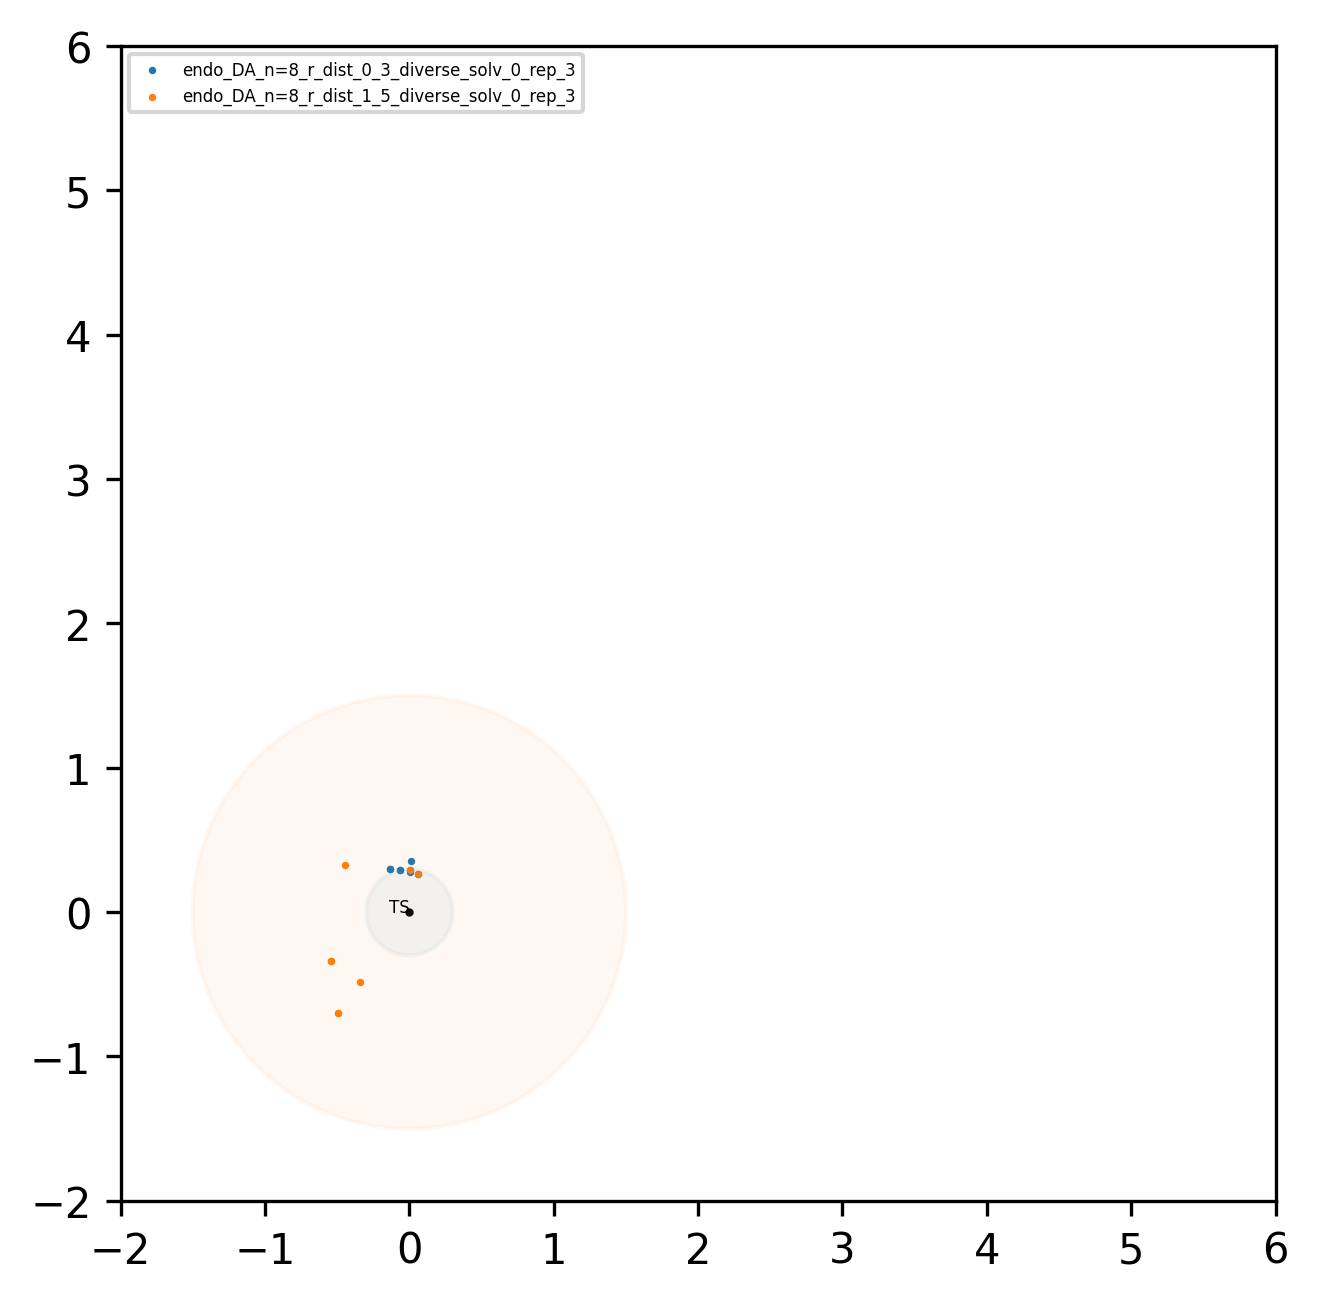

Dataset endo_DA_n=8_r_dist_3_0_diverse_solv_0_rep_3 with length 8
Points:  [[ 1.316  1.396]
 [ 1.506  1.699]
 [-0.542 -0.338]
 [ 1.33   1.265]
 [ 1.726  1.171]
 [ 0.063  0.262]
 [ 1.726  1.171]
 [ 1.506  1.699]]
R1 Distances from TS [ 1.316  1.506 -0.542  1.33   1.726  0.063  1.726  1.506]
R2 Distances from TS [ 1.396  1.699 -0.338  1.265  1.171  0.262  1.171  1.699]


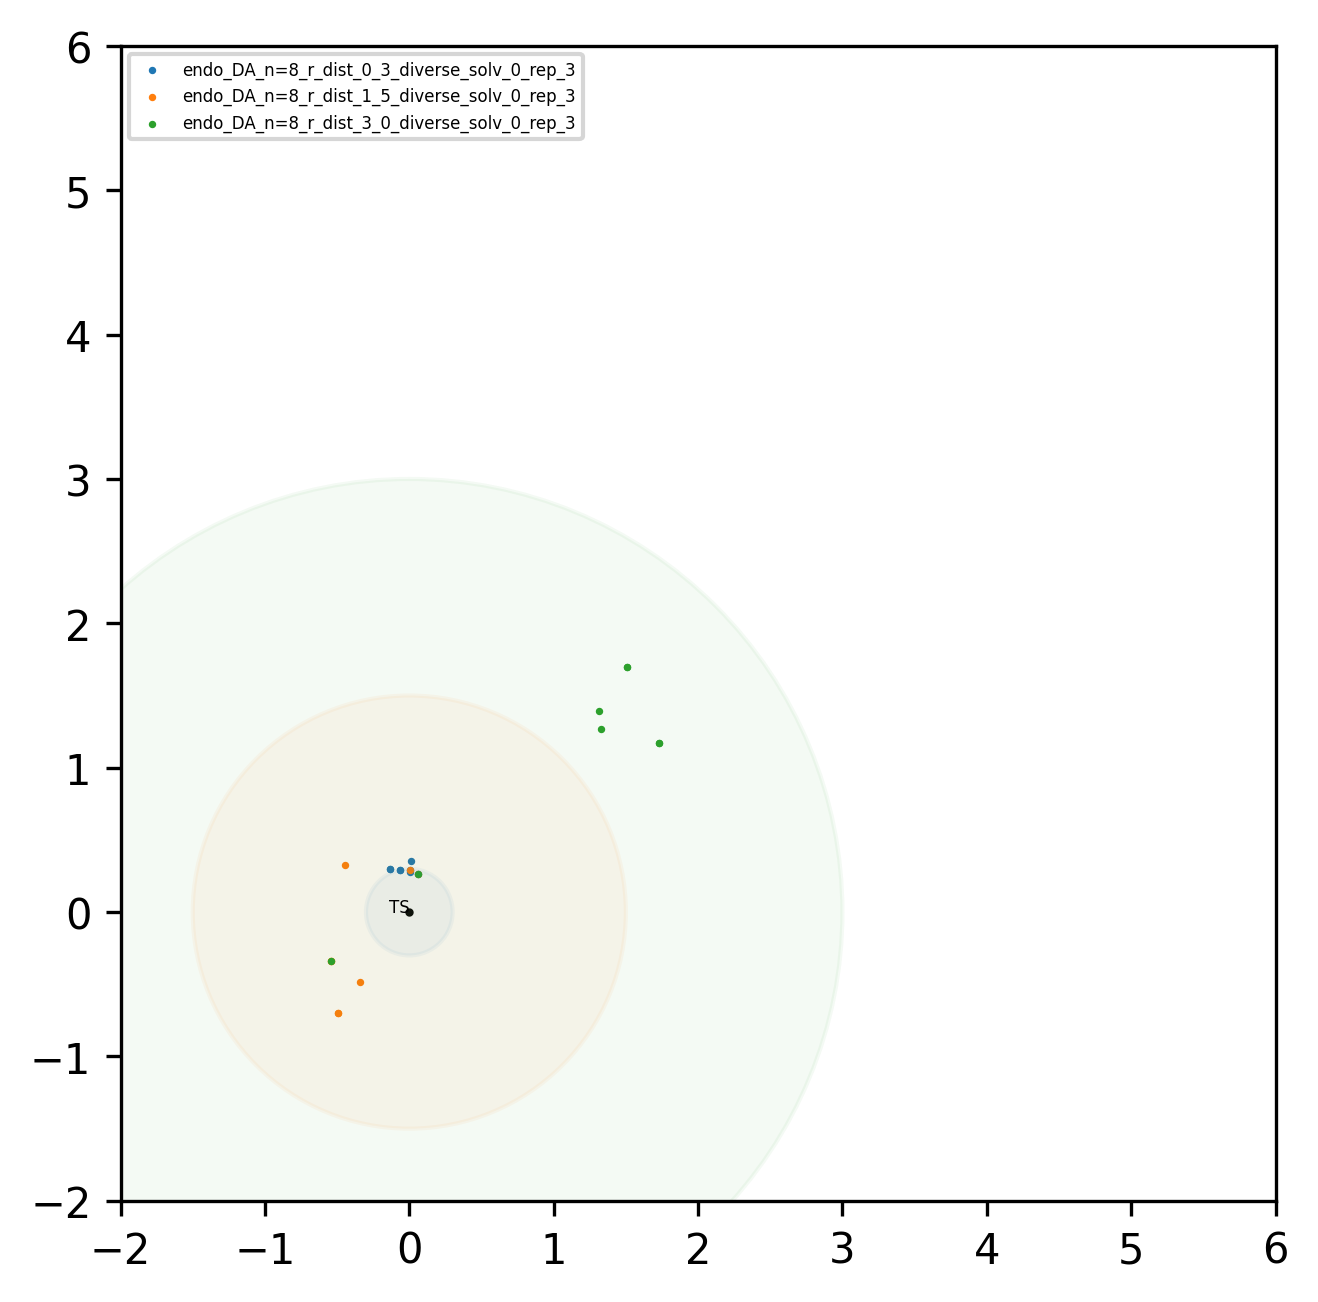

Dataset endo_DA_n=8_r_dist_6_0_diverse_solv_0_rep_3 with length 8
Points:  [[ 1.316  1.396]
 [ 4.246  3.284]
 [ 3.94   3.406]
 [ 1.726  1.171]
 [ 4.246  3.284]
 [ 1.726  1.171]
 [-0.542 -0.338]
 [ 0.063  0.262]]
R1 Distances from TS [ 1.316  4.246  3.94   1.726  4.246  1.726 -0.542  0.063]
R2 Distances from TS [ 1.396  3.284  3.406  1.171  3.284  1.171 -0.338  0.262]


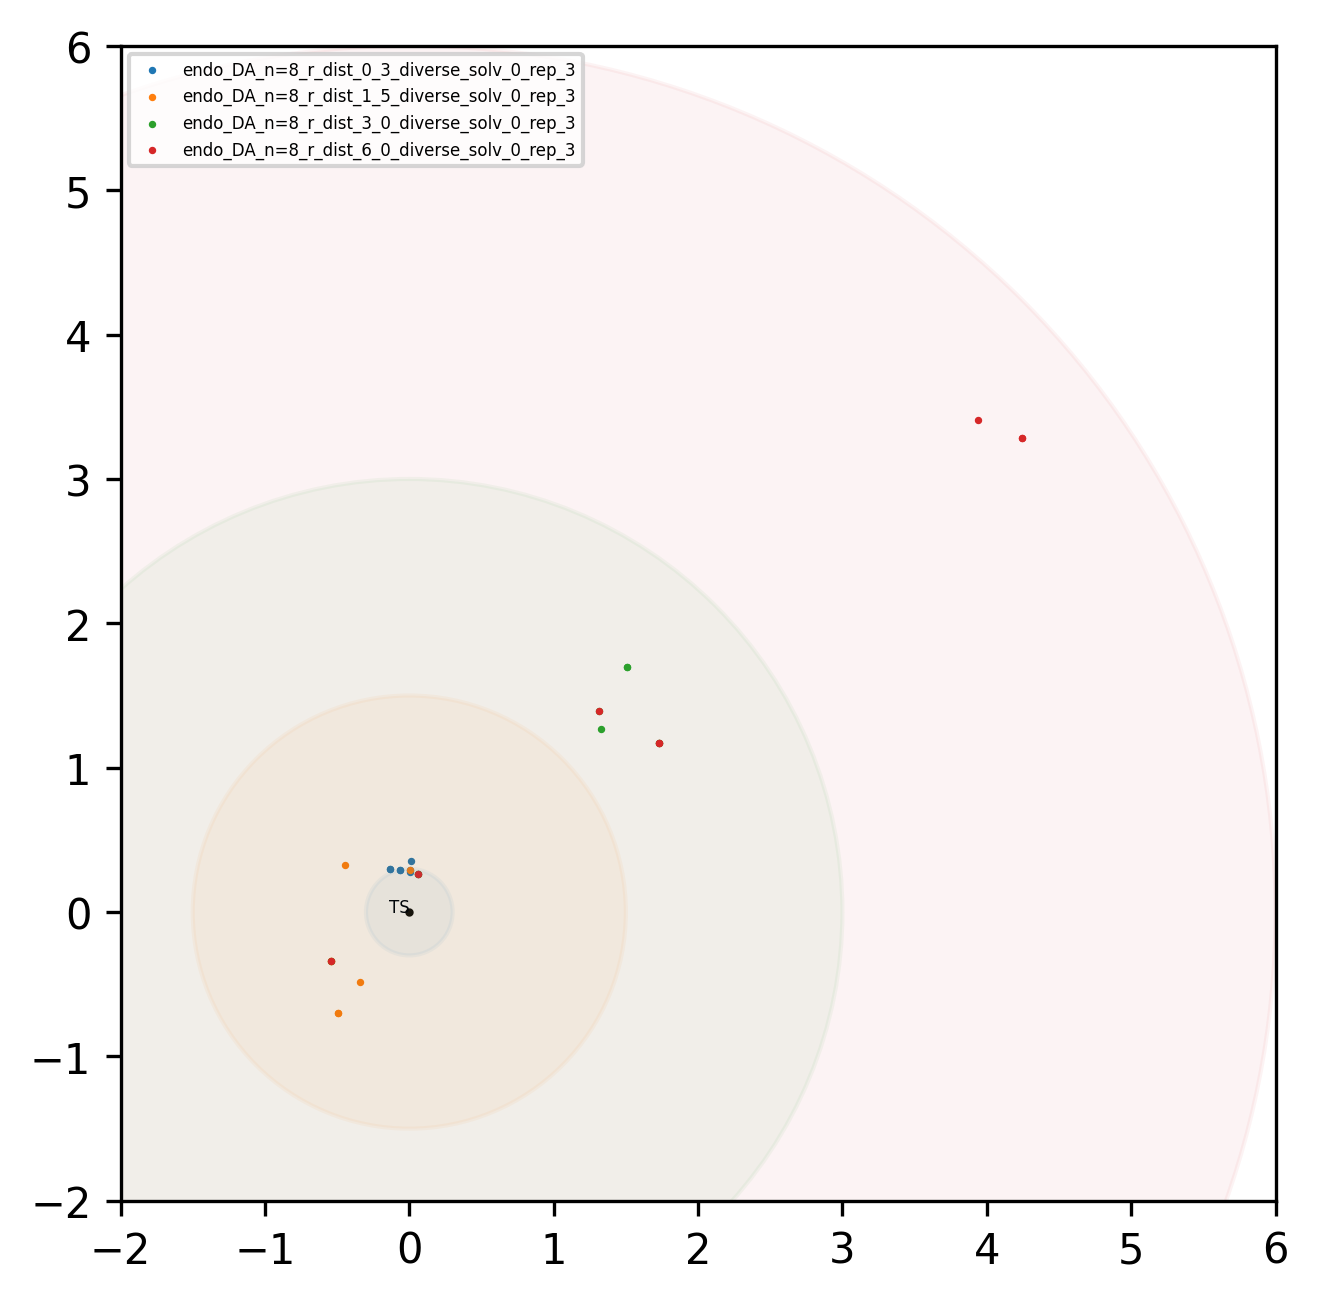

In [8]:
np.set_printoptions(precision=3, suppress=True)

# lim=(0.5, 6.0)
lim=(-2.0, 6.0)
custom_markers = None # ['^', '^', 'X', 'X', '*', '*']
colour_map = list(plt.cm.tab10(np.arange(0, len(ds_fpaths))))

# circle_radii = [0.5, 2.0, 3.0, 4.0, 6.0]
circle_radii = [0.3, 1.5, 3.0, 6.0]

n = 50
all_points = []
all_r1_dists, all_r2_dists = [], []
all_r1_ts_dists, all_r2_ts_dists = [], []
all_config_types = []
all_ds_names = []
for i, (input_ds_fp, dataset_name) in enumerate(zip(ds_fpaths, ds_names)):
    configs = read(input_ds_fp, ':')
    config_types = [config.info.get('config_type') for config in configs]
    r1_dists = [config.get_distance(*r1, mic=True) for config in configs]
    r2_dists = [config.get_distance(*r2, mic=True) for config in configs]
    r1_ts_dists = np.array(r1_dists) - ts_ref_bond_dist_tuple[0]
    r2_ts_dists = np.array(r2_dists) - ts_ref_bond_dist_tuple[0]
    # points = np.array([np.array([x, y]) for x, y in zip(r1_dists[0:n], r2_dists[0:n])])
    points = np.array([np.array([x, y]) for x, y in zip(r1_ts_dists[0:n], r2_ts_dists[0:n])])
    all_points.append(points)
    all_r1_dists.append(r1_dists)
    all_r2_dists.append(r2_dists)
    all_r1_ts_dists.append(r1_ts_dists)
    all_r2_ts_dists.append(r2_ts_dists)
    all_config_types.append(config_types)
    all_ds_names.append(dataset_name)

    print(f'Dataset {dataset_name} with length {len(r1_dists)}')
    print('Points: ', points)
    print('R1 Distances from TS', r1_ts_dists)
    print('R2 Distances from TS', r2_ts_dists)

    properties = {'r1 / A': np.array(r1_dists[0:n]), 'r2 / A':np.array(r2_dists[0:n])}
    widget = chemiscope.show(configs[0:n], properties=properties)
    widget.save(f"{dataset_name}_ts_dist.json")
    
    plt.figure(figsize=(5, 5), dpi=300)
    ax = plt.gca()
    # plot all
    for j, (x, y, ds_name) in enumerate(zip(all_r1_ts_dists, all_r2_ts_dists, all_ds_names)):
        plt.scatter(x, y, alpha=1.0, color=colour_map[j], s=0.6, label=ds_name, zorder=j)

        # Plot circles
        radius = circle_radii[j]
        circle = patches.Circle((0, 0), radius, color=colour_map[j], alpha=0.05, zorder=len(all_ds_names)-j)
        ax.add_patch(circle)
    
    # plot just this subset
    # plt.scatter(r1_dists, r2_dists, alpha=1.0, color=colour_map[i], s=0.6, label=dataset_name, zorder=i)

    ax.set_aspect('equal')
    plt.xlim(lim)
    plt.ylim(lim)
    # *ts_ref_bond_dist_tuple
    plt.scatter(0, 0, color='black', zorder=0, s=1.0)
    plt.text(0, 0, 'TS', fontsize=4, ha='right')
    plt.legend(fontsize=4, loc="upper left")
    plt.show()